In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#  1. Read the dataset to python environment

In [3]:
# Reading the data
data=pd.read_excel("C:\\Users\\adilv\\Downloads\\iris (1).xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Details of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Shape of the data
data.shape

(150, 5)

In [6]:
# Columns in the data
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

#  2. Do the necessary pre-processing steps

In [7]:
# Finding Missing Values in the data
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

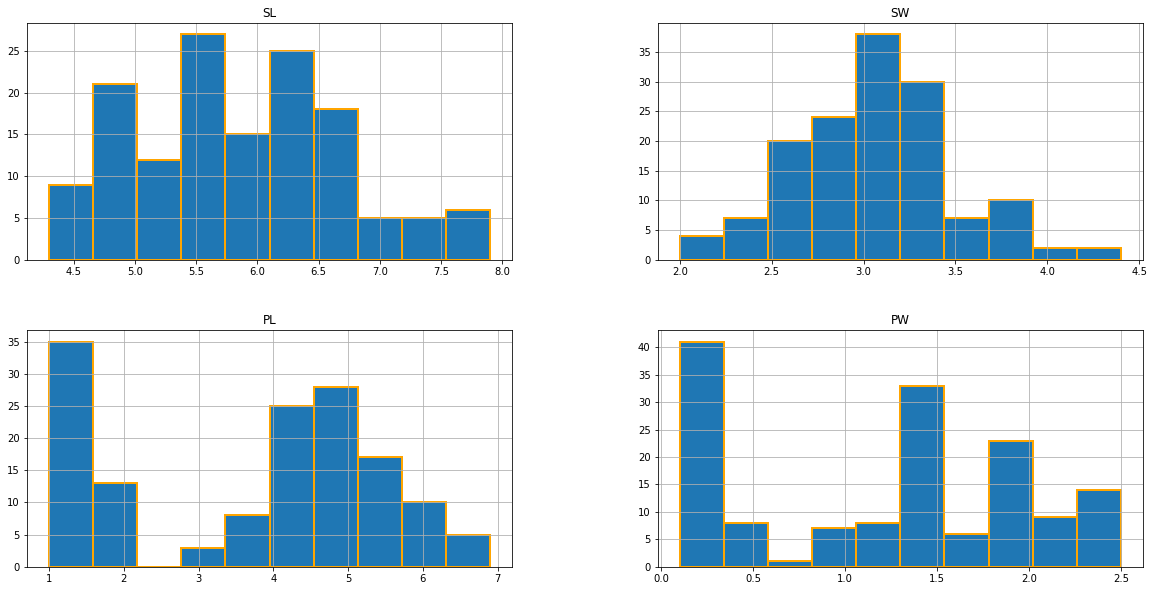

In [8]:
# Plotting histogram of data['SL','SW','PL','PW']
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,10),edgecolor='orange',linewidth=2)
plt.show()

In [9]:
# Filling Missing values with Median
for col in ['SL','SW','PL']:
    data[col]=data[col].fillna(data[col].median())

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
# Summary of the data
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Managing Outliers in the data

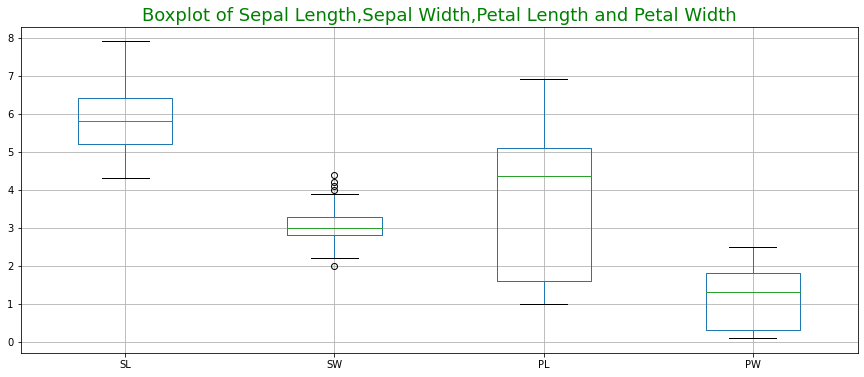

In [12]:
# Boxplot of Sepal Length,Sepal Width,Petal Length and Petal Width
boxplot=data.boxplot(column=['SL','SW','PL','PW'],figsize=(15,6))
plt.title('Boxplot of Sepal Length,Sepal Width,Petal Length and Petal Width',c='green',fontsize=18)
plt.show()

In [ ]:
# There are no outliers in data['SL','PL' and 'PW']. Few outliers are there in data['SW']

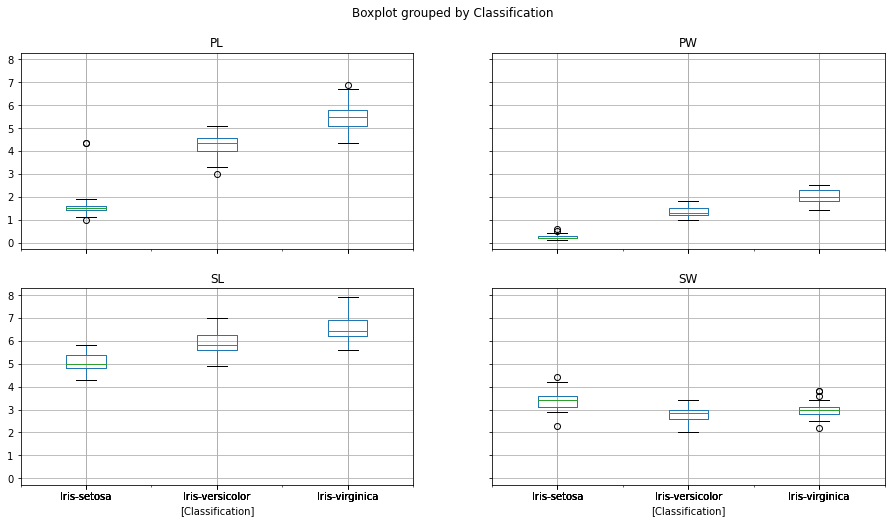

In [13]:
# Boxplot grouped by Classification
data.boxplot(by='Classification',figsize=(15,8))
plt.show()

In [ ]:
# The boxplot based on Classification shows that there are only few outliers in the data

In [14]:
# To display the no. of samples in each class
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [15]:
# Since the data is a Classification type,we can also create models without converting the target column into numerical.
# Mapping data['Classification]
data.Classification=data.Classification.map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [16]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,1
1,4.9,3.0,1.40,0.2,1
2,5.8,3.2,1.30,0.2,1
3,4.6,3.1,1.50,0.2,1
4,5.0,3.6,1.40,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,3
146,6.3,2.5,5.00,1.9,3
147,6.5,3.0,4.35,2.0,3
148,6.2,3.4,5.40,2.3,3


In [17]:
# We can also Label Encode data['Classification'] instead of Map function
# Label Encoding has the disadvantage that the numerical values can be misinterpreted as having some sort of hierarchy
# or order in them
# Label Encoding data['Classification']

# from sklearn.preprocessing import LabelEncoder

In [18]:
# lab_enc=LabelEncoder()
# data['Classification']=lab_enc.fit_transform(data['Classification'])
# data

In [19]:
# Label Encoding labels 1ris-setosa as 0,Iris-versicolor as 1 and Iris-virginica as 2

<AxesSubplot:>

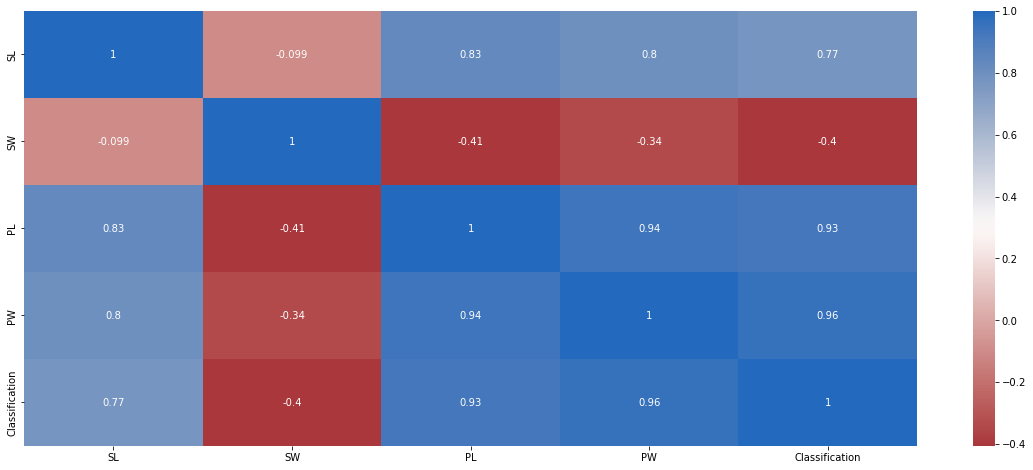

In [20]:
# Correlation Matrix
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,cmap='vlag_r')

In [ ]:
# Since this is a small data, we are not dropping highly correlated and less correlated features.

#   Visualizing the whole data

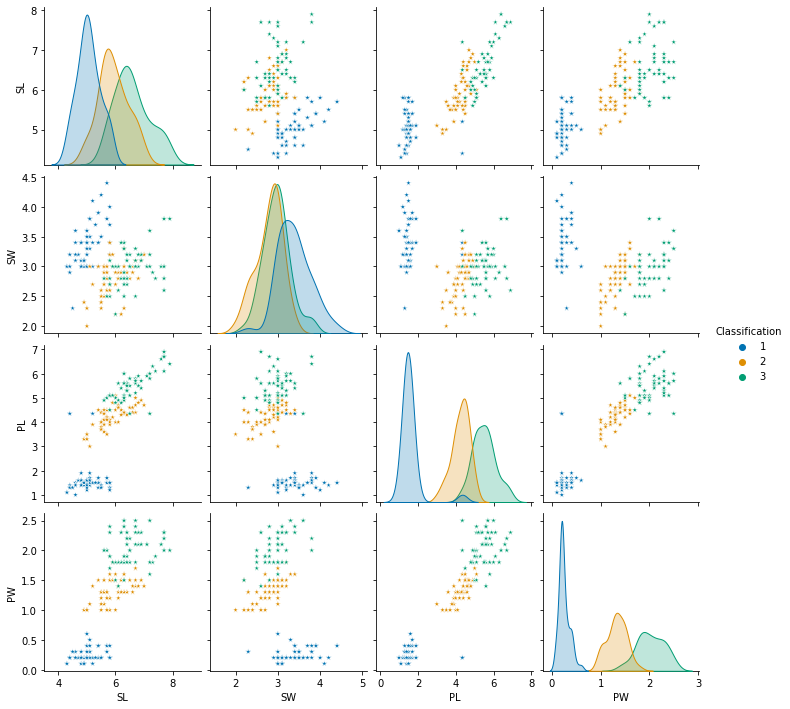

In [21]:
sns.pairplot(data,hue='Classification',markers='*',palette='colorblind')
plt.show()

In [ ]:
# From this visualization, it is clear that Iris-setosa is well separated from the other two flowers (Iris-versicolor 
# and Iris-virginica)

# 3. Find out which classification model gives the best result (also do 
#     random forest algorithm)

In [22]:
# Splitting data into Features and Target (data['Classification] is the target variable)
X=data.drop('Classification',axis=1)
y=data['Classification']

#    Model

In [23]:
# Splitting the Features and Target into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

#    Creating Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logit_model=LogisticRegression()
logit_model=logit_model.fit(X_train,y_train)
y_pred_logit=logit_model.predict(X_test)

In [26]:
y_pred_logit

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1], dtype=int64)

In [27]:
y_test.value_counts()

3    11
1    10
2     9
Name: Classification, dtype: int64

In [28]:
# Evaluating Logistic Regression Model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [29]:
confusion_matrix(y_test,y_pred_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [30]:
accuracy_score(y_test,y_pred_logit)

1.0

In [31]:
print('classification_report :\n',classification_report(y_test,y_pred_logit))

classification_report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#  Creating kNN Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
metric_k=[]
neighbors=range(2,11)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [34]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0]

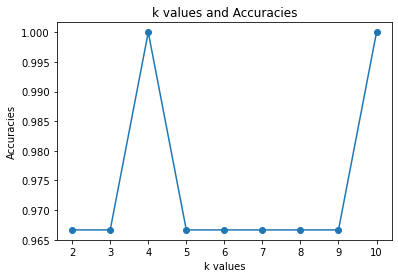

In [35]:
# Plotting k values and Accuracies
plt.plot(neighbors,metric_k,'o-')
plt.title('k values and Accuracies')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.show()

In [ ]:
# When k=4

In [36]:
classifier=KNeighborsClassifier(n_neighbors=4)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [37]:
# Evaluating kNN Model
confusion_matrix(y_test,y_pred_kNN)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [38]:
accuracy_score(y_test,y_pred_kNN)

1.0

#   Creating SVM Model  (Support Vector Classifier) ..Linear Kernel

In [39]:
from sklearn.svm import SVC

In [40]:
svm_clf=SVC(kernel='linear')
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [41]:
# Evaluating SVM(kernel='linear') Model
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [42]:
accuracy_score(y_test,y_pred_svm)

1.0

#   Creating SVM Model ...RBF (Radial Basis Function) Kernel

In [43]:
svm_clf1=SVC(kernel='rbf')
svm_clf1=svm_clf1.fit(X_train,y_train)
y_pred_svm1=svm_clf1.predict(X_test)

In [44]:
# Evaluating SVM(kernel='rbf') Model
confusion_matrix(y_test,y_pred_svm1)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [45]:
accuracy_score(y_test,y_pred_svm1)

1.0

#   Creating Decision Tree Classifier Model

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [48]:
# Evaluating Decision Tree Classifier Model
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [49]:
accuracy_score(y_test,y_pred_dt)

1.0

#   Creating Random Forest Classifier Model

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [52]:
y_test

73     2
18     1
118    3
78     2
76     2
31     1
64     2
141    3
68     2
82     2
110    3
12     1
36     1
9      1
19     1
56     2
104    3
69     2
55     2
132    3
29     1
127    3
26     1
128    3
131    3
145    3
108    3
143    3
45     1
30     1
Name: Classification, dtype: int64

In [53]:
y_pred_rf

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1], dtype=int64)

In [54]:
# Evaluating Random Forest Classifier Model
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [55]:
accuracy_score(y_test,y_pred_rf)

1.0

In [ ]:
# The classification models ,Logistic Regression,SVM (kernel=linear and kernel=rbf),kNN,Decision Tree Classifier and
# Random Forest Classifier give the best result on iris dataset (which is a small dataset) when the test size is .2. 
# The accuracy score is 100%.It just means that based on the training data supplied to it, the model is able to predict
# all the values in the test set correctly.That is, the predicted values and the test values are the same. But when we 
# change the test size, the accuracy changes.

In [ ]:
# Changing the test size
# When test size=.3

#  Model

In [56]:
# Splitting the Features and Target into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.3)

#  Creating Logistic Regression Model

In [57]:
logit_model1=LogisticRegression()
logit_model1=logit_model1.fit(X_train,y_train)
y_pred_logit1=logit_model1.predict(X_test)

In [58]:
# Evaluating Logistic Regression Model
confusion_matrix(y_test,y_pred_logit1)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [59]:
accuracy_score(y_test,y_pred_logit1)

0.9777777777777777

#  Creating kNN Model

In [60]:
metric_k=[]
neighbors=range(2,15)

for k in neighbors:
    classifier1=KNeighborsClassifier(n_neighbors=k)
    classifier1=classifier1.fit(X_train,y_train)
    y_pred_kNN1=classifier1.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN1)
    metric_k.append(acc)

In [61]:
metric_k

[0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

In [62]:
classifier1=KNeighborsClassifier(n_neighbors=4)
classifier1=classifier1.fit(X_train,y_train)
y_pred_kNN1=classifier1.predict(X_test)

In [63]:
# Evaluating kNN Model
confusion_matrix(y_test,y_pred_kNN1)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [64]:
accuracy_score(y_test,y_pred_kNN1)

0.9777777777777777

#  Creating SVM Model (Support Vector Classifier) ..Linear Kernel

In [65]:
svm_clf2=SVC(kernel='linear')
svm_clf2=svm_clf2.fit(X_train,y_train)
y_pred_svm2=svm_clf2.predict(X_test)

In [66]:
# Evaluating SVM(kernel='linear') Model
confusion_matrix(y_test,y_pred_svm2)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [67]:
accuracy_score(y_test,y_pred_svm2)

1.0

#  Creating SVM Model ...RBF (Radial Basis Function) Kernel

In [68]:
svm_clf3=SVC(kernel='rbf')
svm_clf3=svm_clf3.fit(X_train,y_train)
y_pred_svm3=svm_clf3.predict(X_test)

In [70]:
# Evaluating SVM(kernel='rbf') Model
confusion_matrix(y_test,y_pred_svm3)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [71]:
accuracy_score(y_test,y_pred_svm3)

0.9777777777777777

#  Creating DecisionTreeClassifier Model

In [72]:
dt_clf1=DecisionTreeClassifier()
dt_clf1=dt_clf1.fit(X_train,y_train)
y_pred_dt1=dt_clf1.predict(X_test)

In [73]:
# Evaluating Decision Tree Classifier Model
confusion_matrix(y_test,y_pred_dt1)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [74]:
accuracy_score(y_test,y_pred_dt1)

1.0

#  Creating Random Forest Classifier Model

In [75]:
rf_clf1=RandomForestClassifier()
rf_clf1=rf_clf1.fit(X_train,y_train)
y_pred_rf1=rf_clf1.predict(X_test)

In [76]:
# Evaluating Random Forest Classifier Model
confusion_matrix(y_test,y_pred_rf1)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [77]:
accuracy_score(y_test,y_pred_rf1)

1.0

In [ ]:
# When the test size=.3,the classification models ,SVM (kernel=linear),Decision Tree Classifier and
# Random Forest Classifier give the best result(accuracy score=100%) than Logistic Regression,kNN and SVM (kernel=RBF)
# on iris dataset.When accuracy score=1,this implies that based on the training data supplied to it, the model is 
# able to predict all the values in the  test set correctly.Logistic Regression,kNN and SVM (kernel=RBF) also have a 
# good accuracy score  of 0.977